<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Validacion-cruzada/blob/main/Validaci%C3%B3n_Cruzada_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Validación Cruzada

**Validación cruzada en regresión:** varias métricas y tiempo de ejecución

cross_validate(model, X, Y, cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'), return_train_score=True)

*Nota*: las métricas deben multiplicarse por -1 porque scikit-learn asume que "más grande es mejor"


**Validación cruzada en clasficación:** muestreo estratificado

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_validate(model, X, Y, cv=cv, scoring=('f1', 'accuracy','precision', 'recall'), return_train_score=True)


In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   videojuego                 152 non-null    object
 1   Edad                       152 non-null    int64 
 2   Sexo                       152 non-null    object
 3   Plataforma                 152 non-null    object
 4   Consumidor_habitual        152 non-null    bool  
 5   Presupuesto para invertir  152 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 6.2+ KB


In [ ]:
#Corrección de tipos de datos


In [ ]:
#Descripción de variables numéricas
data.describe()

,Edad,Presupuesto para invertir
count,152.000000,152.000000
mean,28.000000,343.289474
std,9.990724,291.945464
min,14.000000,20.000000
25%,21.000000,100.000000
50%,26.000000,275.000000
75%,34.000000,420.000000
max,52.000000,1200.000000


<Axes: >

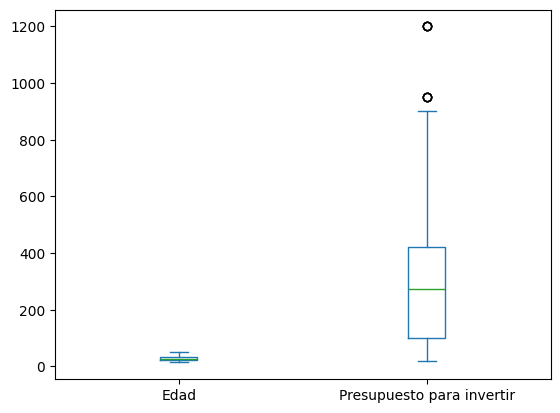

In [ ]:
data.plot(kind='box')

<Axes: xlabel='videojuego'>

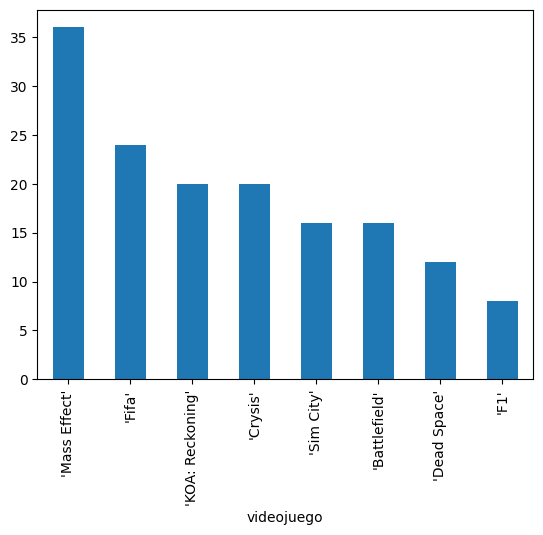

In [ ]:
#Descripción variables categóricas
data['videojuego'].value_counts().plot(kind='bar')

<Axes: xlabel='Plataforma'>

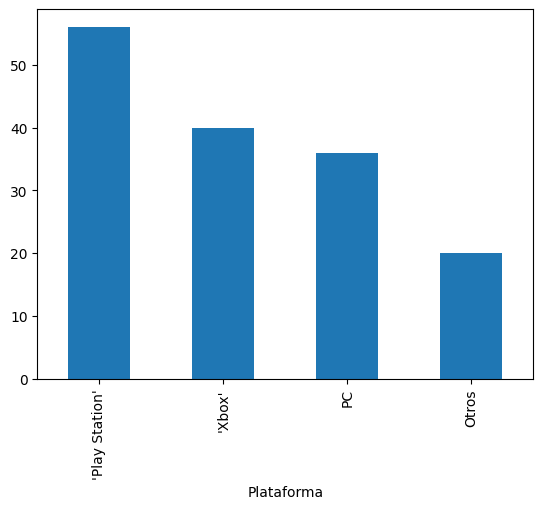

In [ ]:
data['Plataforma'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

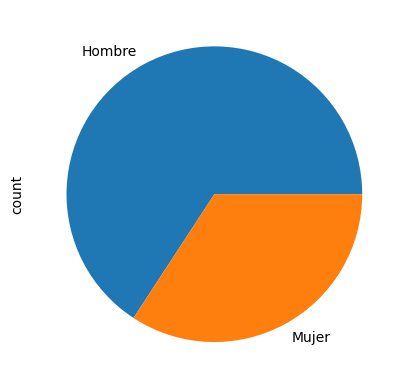

In [ ]:
data['Sexo'].value_counts().plot(kind='pie')

<Axes: xlabel='Consumidor_habitual'>

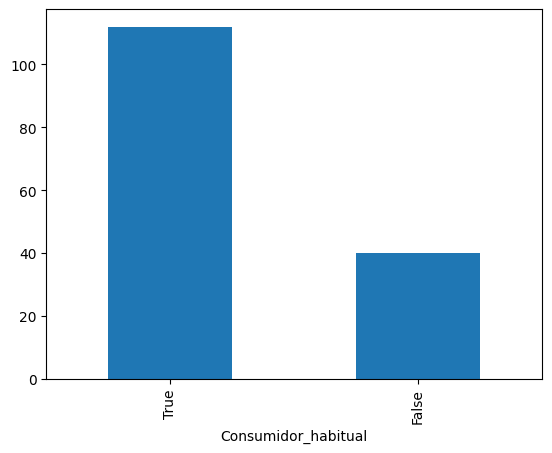

In [ ]:
data['Consumidor_habitual'].value_counts().plot(kind='bar')

In [ ]:
#Creamos variables dummy para convertir  las categorías a números
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'], drop_first=True, dtype=int)
data.head()

#No hay labelencoder-> Variable objetivo ya es numérica

,Edad,Presupuesto para invertir,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,29,200,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,27,600,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,22,200,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,28,370,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,30,100,0,0,0,0,0,1,0,0,0,0,0,1,1,1


# 2. Validación Cruzada







In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_validate

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
#Medidas de evaluación
scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error')
#Muestreo lineal
cv=10 #No es muestreo estratificado

In [ ]:
#Se separa variables predictoras y objetivo
X = data.drop("Presupuesto para invertir", axis = 1)
Y = data['Presupuesto para invertir']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Edad                         152 non-null    int64
 1   videojuego_'Battlefield'     152 non-null    int64
 2   videojuego_'Crysis'          152 non-null    int64
 3   videojuego_'Dead Space'      152 non-null    int64
 4   videojuego_'F1'              152 non-null    int64
 5   videojuego_'Fifa'            152 non-null    int64
 6   videojuego_'KOA: Reckoning'  152 non-null    int64
 7   videojuego_'Mass Effect'     152 non-null    int64
 8   videojuego_'Sim City'        152 non-null    int64
 9   Plataforma_'Play Station'    152 non-null    int64
 10  Plataforma_'Xbox'            152 non-null    int64
 11  Plataforma_Otros             152 non-null    int64
 12  Plataforma_PC                152 non-null    int64
 13  Sexo_Mujer                   152 non-null    int64

# TREE

In [ ]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=10, max_depth=None)


scores = cross_validate(modelTree, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.003027,0.003906,-121.212753,-111.913324,-32761.095437,-29970.758239,-181.000264,-173.120646,-0.344011,-0.429693
1,0.003340,0.003916,-98.007479,-116.476244,-30804.524856,-30284.830651,-175.512179,-174.025374,-0.509361,-0.430645
2,0.002872,0.003391,-181.117848,-124.376384,-54314.751239,-33596.119635,-233.055254,-183.292443,-0.668951,-0.537880
3,0.002477,0.003950,-146.559809,-119.201166,-51318.899029,-29363.187044,-226.536750,-171.356900,-0.524025,-0.454011
4,0.002370,0.003612,-146.935570,-122.074726,-44008.034767,-33862.121417,-209.780921,-184.016634,-0.657099,-0.446391
5,0.003501,0.003674,-122.276059,-111.694040,-34349.657596,-29837.365160,-185.336606,-172.734956,-0.330558,-0.428121
6,0.002891,0.003467,-97.133903,-115.950465,-32003.015814,-30132.711044,-178.893867,-173.587762,-0.524636,-0.428001
7,0.002424,0.003347,-174.940116,-125.295384,-53551.550096,-33624.609548,-231.412079,-183.370144,-0.631446,-0.534275
8,0.002320,0.003223,-155.650718,-117.807669,-53137.080848,-29144.208942,-230.514817,-170.716751,-0.527783,-0.450910
9,0.002316,0.003230,-132.997821,-123.443581,-40190.450135,-34197.372827,-200.475560,-184.925317,-0.590167,-0.444037


In [ ]:
# Promedios
scores.mean()


,0
fit_time,0.002754
score_time,0.003572
test_neg_mean_absolute_error,-137.683208
train_neg_mean_absolute_error,-118.823298
test_neg_mean_squared_error,-42643.905982
train_neg_mean_squared_error,-31401.328451
test_neg_root_mean_squared_error,-205.251830
train_neg_root_mean_squared_error,-177.114693
test_neg_mean_absolute_percentage_error,-0.530804
train_neg_mean_absolute_percentage_error,-0.458397


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree
0 -121.212753
1  -98.007479
2 -181.117848
3 -146.559809
4 -146.935570
5 -122.276059
6  -97.133903
7 -174.940116
8 -155.650718
9 -132.997821


In [ ]:
#Tree
modelTree.fit(X, Y) #100%

DecisionTreeRegressor(min_samples_leaf=10)

# KNN

In [ ]:
#Validación cruzada con Knn

# Normalizar las variables numéricas

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
var_num=['Edad']
min_max_scaler.fit(X[var_num]) #Ajuste de los parametros: max - min
X[var_num]= min_max_scaler.transform(X[var_num]) #70%
X.head()

,Edad,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,0.394737,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,0.342105,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,0.210526,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0.368421,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0.421053,0,0,0,0,0,1,0,0,0,0,0,1,1,1


In [ ]:
#Validación Cruzada

#Método Perezoso
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean')


scores = cross_validate(model_knn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.004190,0.004376,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,0.002609,0.005577,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,0.002189,0.005198,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.002269,0.003757,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0.002621,0.003765,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,0.002170,0.003529,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,0.002108,0.003504,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
7,0.002843,0.003771,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
8,0.003892,0.006152,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
9,0.003757,0.006186,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree  Knn
0 -121.212753 -0.0
1  -98.007479 -0.0
2 -181.117848 -0.0
3 -146.559809 -0.0
4 -146.935570 -0.0
5 -122.276059 -0.0
6  -97.133903 -0.0
7 -174.940116 -0.0
8 -155.650718 -0.0
9 -132.997821 -0.0


# NN

In [ ]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPRegressor
model_rn = MLPRegressor(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.02, momentum= 0.3, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.162700,0.004081,-173.461850,-157.367607,-47420.799721,-35952.290117,-217.763173,-189.610891,-1.059224,-1.089458
1,0.159097,0.004467,-149.213950,-162.157241,-31275.561009,-37490.766549,-176.848978,-193.625325,-1.408708,-1.104366
2,0.170763,0.004138,-199.090326,-151.769143,-48793.861802,-34899.858139,-220.893327,-186.815037,-1.149761,-0.998530
3,0.168958,0.003606,-155.441902,-160.749715,-40818.894120,-36340.092016,-202.036863,-190.630774,-1.016407,-1.111422
4,0.226756,0.006105,-168.176991,-158.342916,-36387.355862,-36627.419868,-190.754701,-191.382914,-0.945485,-1.048183
5,0.283359,0.004817,-163.721379,-152.581126,-43956.048711,-34099.787630,-209.656979,-184.661278,-1.001561,-1.027009
6,0.245803,0.004995,-160.690682,-165.607144,-34516.261603,-39854.700146,-185.785526,-199.636420,-1.650052,-1.185393
7,0.245132,0.004971,-195.823005,-157.054686,-48715.922946,-37307.105641,-220.716839,-193.150474,-1.186720,-1.086734
8,0.236082,0.004885,-154.757517,-162.116869,-41768.426820,-37043.266735,-204.373254,-192.466274,-1.009515,-1.135362
9,0.261002,0.004793,-138.336182,-140.042726,-25411.668444,-28456.534385,-159.410377,-168.690647,-0.825406,-0.957038


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Nn']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree  Knn          Nn
0 -121.212753 -0.0 -173.461850
1  -98.007479 -0.0 -149.213950
2 -181.117848 -0.0 -199.090326
3 -146.559809 -0.0 -155.441902
4 -146.935570 -0.0 -168.176991
5 -122.276059 -0.0 -163.721379
6  -97.133903 -0.0 -160.690682
7 -174.940116 -0.0 -195.823005
8 -155.650718 -0.0 -154.757517
9 -132.997821 -0.0 -138.336182


<Axes: >

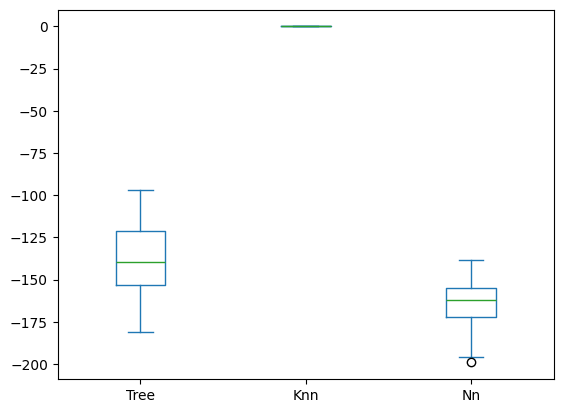

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

# 3. Hipótesis

H₀ (nula): No hay diferencia significativa en el desempeño (test_f1) entre los modelos.

H₁ (alternativa): Al menos un modelo tiene un desempeño significativamente diferente.

Se puede usar:
* ANOVA + Tukey
* Friedman + Nemenyi

Nota: Si no existe diferencia estadística significativa se selecciona el modelo por complejidad computacional. *texto en cursiva*

In [ ]:
comparacion_CV

,Tree,Knn,Nn
0,-121.212753,-0.0,-173.461850
1,-98.007479,-0.0,-149.213950
2,-181.117848,-0.0,-199.090326
3,-146.559809,-0.0,-155.441902
4,-146.935570,-0.0,-168.176991
5,-122.276059,-0.0,-163.721379
6,-97.133903,-0.0,-160.690682
7,-174.940116,-0.0,-195.823005
8,-155.650718,-0.0,-154.757517
9,-132.997821,-0.0,-138.336182


# 4. Modelo final con todos los datos

[Text(0.4230769230769231, 0.9285714285714286, 'Consumidor_habitual_True <= 0.5\nsquared_error = 84671.416\nsamples = 152\nvalue = 343.289'),
 Text(0.15384615384615385, 0.7857142857142857, 'Edad <= 24.0\nsquared_error = 6621.0\nsamples = 40\nvalue = 103.0'),
 Text(0.28846153846153844, 0.8571428571428572, 'True  '),
 Text(0.07692307692307693, 0.6428571428571429, 'squared_error = 6666.667\nsamples = 12\nvalue = 200.0'),
 Text(0.23076923076923078, 0.6428571428571429, 'Plataforma_PC <= 0.5\nsquared_error = 840.816\nsamples = 28\nvalue = 61.429'),
 Text(0.15384615384615385, 0.5, 'squared_error = 368.75\nsamples = 16\nvalue = 42.5'),
 Text(0.3076923076923077, 0.5, 'squared_error = 355.556\nsamples = 12\nvalue = 86.667'),
 Text(0.6923076923076923, 0.7857142857142857, 'Edad <= 33.5\nsquared_error = 84560.81\nsamples = 112\nvalue = 429.107'),
 Text(0.5576923076923077, 0.8571428571428572, '  False'),
 Text(0.5384615384615384, 0.6428571428571429, "Plataforma_'Xbox' <= 0.5\nsquared_error = 37600.68

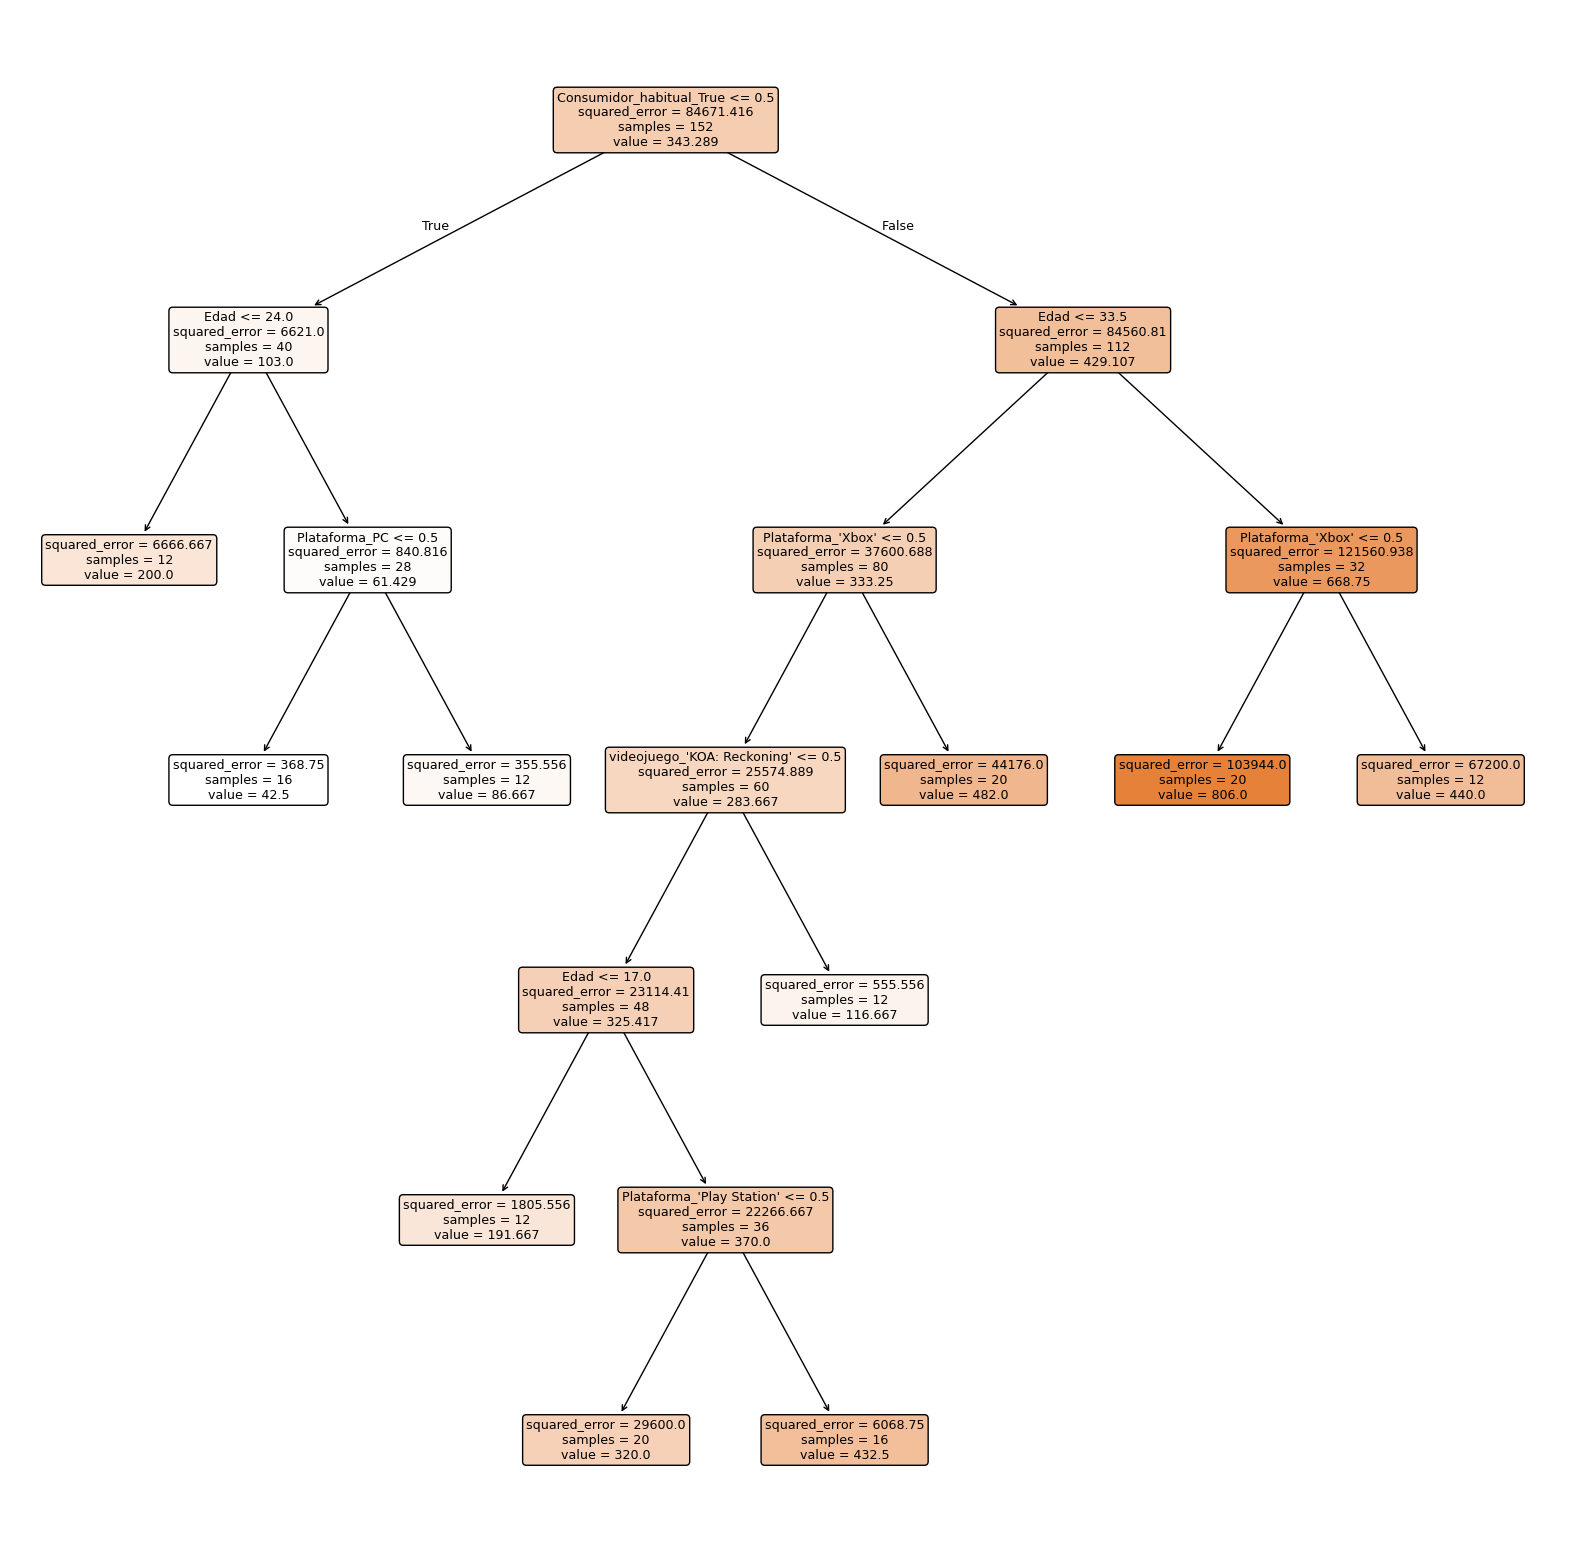

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelTree, feature_names=X.columns.values, rounded=True, filled=True)

In [ ]:

#Knn
model_knn.fit(X, Y) #100%


KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [ ]:

#NN
model_rn.fit(X, Y) #100%

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=16, learning_rate_init=0.02, max_iter=500,
             momentum=0.3)

# 4. Guardamos el modelo

In [ ]:
import pickle
filename = 'modeloCV.pkl'
variables=X.columns._values
pickle.dump([modelTree,model_knn,model_rn,variables,min_max_scaler], open(filename, 'wb'))